# Use Case 2: Compare Generation Methods for a Single Dataset
1. Load data
2. Generate synthetitc data using multiple generation methods
3. Compare results and determine the supirior method for the data in question

## Imports

In [2]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd

/home/hyrup/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


## Load data and synthesize

In [3]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm"]
result_name = "breasts_methods"

* `split_size`: Proportion of data used for training. The rest is used for testing/evaluation.
* `train_plugin`: Can take a list of plugin names that are passed to the `train_adapter` (`synthcity` by default).
* `gen_count`: Number of synthetic records to be generated.
* `n_jobs`: Numbeer of jobs to run in parallel.
* `eval_target_col`: Column name for an attribute used as the target for predictive evaluation methods.

The results are saved in a list; one element for each generation methods. To access the synthetic data for the first generation method: `state[0].synth`

In [4]:
state = Load("mstz/breast").Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=1000, n_jobs=len(gen_methods), eval_target_col="is_cancer")

[2024-04-22T14:41:59.535378+0200][138469][CRITICAL] module disabled: /home/hyrup/miniconda3/envs/synth/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
 35%|███▌      | 350/1000 [04:27<08:17,  1.31it/s]
[2024-04-22T14:46:29.163972+0200][138469][CRITICAL] module disabled: /home/hyrup/miniconda3/envs/synth/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2024-04-22T14:46:32.701211+0200][138469][CRITICAL] module disabled: /home/hyrup/miniconda3/envs/synth/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 9/9 [00:03<00:00,  2.81it/s]
[2024-04-22T14:46:36.515428+0200][138469][CRITICAL] module disabled: /home/hyrup/miniconda3/envs/synth/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
 10%|▉         | 999/10000 [06:14<56:15,  2.67it/s]  
[2024-04-22T14:52:51.204147+0200][138469][CRITICAL] module disabled: /home/hyrup/miniconda3/envs/synth/lib/python3.10/site-packages/synthcity/plugins

## Read output files and comapare results

In [5]:
results = pd.DataFrame(columns=["f1_diff", "auroc_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"], eval.loc["auroc", "val"]]
results

,f1_diff,auroc_diff
tvae,0.034224,0.000000
bayesian_network,0.030200,0.007447
privbayes,0.154245,0.008865
adsgan,0.009600,0.000355
ctgan,0.010079,0.003191
ddpm,0.010546,0.002128


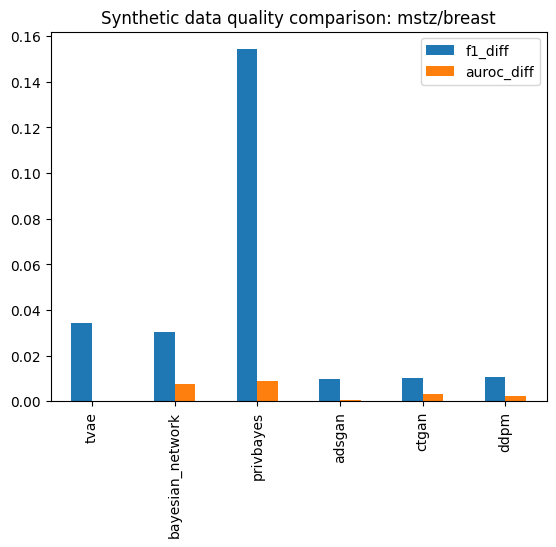

In [6]:
results.plot.bar()
plt.title("Synthetic data quality comparison: mstz/breast")
plt.show()